In [ ]:
# Load representations, Jacobians, and distances for analysis

In [1]:
import torch
import torchinfo
import torch.nn as nn
from PIL import Image
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import dsutils 
import metrics
import jsutils

import os
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.manifold import MDS
from sklearn.decomposition import PCA

import pickle

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Using {device} for inference')

Using cpu for inference


In [41]:
# Load deep representations (if needed)

with open('internal_reps_with_model_2nd_half.pkl', 'rb') as f:
    repDict = pickle.load(f)


In [2]:
# Load Jacobians r by n

J_dict_rbyn = {}

model_names = ["alexnet", "resnet18", "resnet34", "resnet50", "resnet101", "resnet152", "vgg16"]

N_models = len(model_names)
for model_name in model_names:
    with open(model_name + '_decoding_Js.pkl', 'rb') as f:
        new_J = pickle.load(f)
        J_dict_rbyn.update(new_J)
        print(model_name)

alexnet
resnet18
resnet34
resnet50
resnet101
resnet152
vgg16


In [ ]:
# Load Jacobians m by n

import pickle

J_dict_mbyn = {}

model_names = ["alexnet", "resnet18", "resnet34", "resnet50", "resnet101", "resnet152", "vgg16"]

N_models = len(model_names)
for model_name in model_names:
    with open(model_name + '_decoding_Js_mbyn.pkl', 'rb') as f:
        new_J = pickle.load(f)
        J_dict_mbyn.update(new_J)
        print(model_name)

In [3]:
# Load Bures distance matrices 

bures_dict = np.load('bures_dists_penultimate_decoding_Jrbyn.npz')

In [86]:
# Average over all images

bures_dists_all_rbyn = bures_dict["bures_dists"]
model_names = bures_dict["model_names"]

bures_dists_mean = np.zeros(bures_dict["bures_dists"][0].shape)
for j in range(bures_dists_all_rbyn[0].shape[0]):
    for k in range(bures_dists_all_rbyn[0].shape[0]):
        bures_dists_mean[j,k] = np.mean([bures_dists_all_rbyn[i][j,k] for i in range(len(bures_dists_all_rbyn))])


In [87]:
model_names[:]

array(['alexnet', 'resnet18', 'resnet34', 'resnet50', 'resnet101',
       'resnet152', 'inceptionv3', 'vgg16'], dtype='<U11')

In [88]:
# Delete inceptionv3

bures_dists_mean = np.delete(bures_dists_mean,6,axis=0)
bures_dists_mean = np.delete(bures_dists_mean,6,axis=1)
model_names = np.delete(model_names,6)

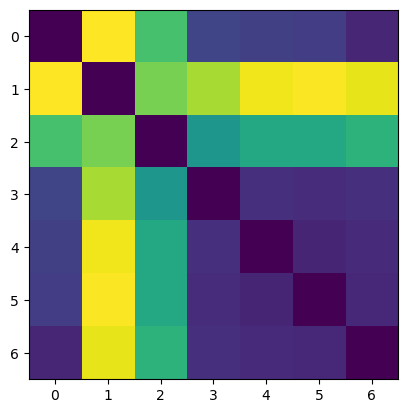

In [90]:
plt.imshow(bures_dists_mean)

In [91]:
embedding = MDS(n_components=15, metric= True, eps = 0.00001, normalized_stress='auto', dissimilarity='precomputed')
Z = embedding.fit_transform(bures_dists_mean)
embedding.stress_

np.float64(5.049659755721826e-10)

In [92]:
pca = PCA(n_components=2)
pcs1 = pca.fit_transform(Z)
np.sum(pca.explained_variance_ratio_)

np.float64(0.9579074287263674)

Text(0.5, 1.0, 'Average Bures distance between r by N Jacobians')

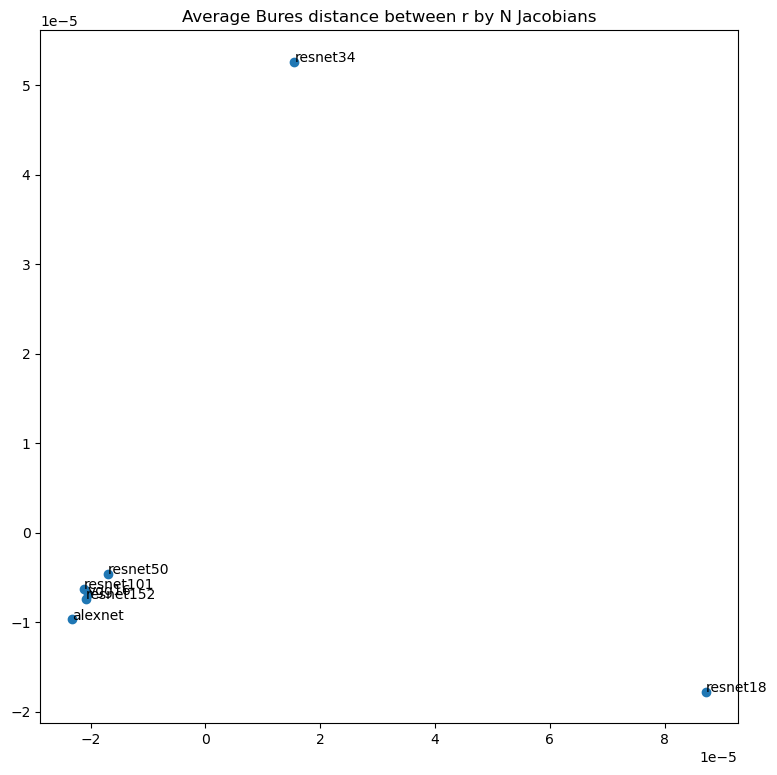

In [94]:
fig = plt.figure(figsize= (9,9))
ax = fig.add_subplot(1,1,1)

ax.scatter(pcs1[:,0], pcs1[:,1])

for i, txt in enumerate(model_names):
    ax.text(pcs1[i,0], pcs1[i,1],txt)

plt.title('Average Bures distance between r by N Jacobians')